# Assessment 1 - Machine Learning
# (Exercise 1 - Regression Task)

**Kaggle Notebook by Val Kyrvey L. Latoja**

**Brief**

The student is tasked to do two (2) exercises that will put their fundamental knowledge of machine learning to the test. The data must have a minimum of 5 features (Columns) with no limitation.

**Goal**

The goal is to complete all tasks and exercises as per the instructions from the [GitHub](https://github.com/usmanahmad11/Experiment-Portfolio/wiki/Machine-Learning-Assignment-1-%E2%80%90-40%25-Instructions) page implemented by the advisor. The student should know the crucial knowledge of machine learning methods and algorithms.

## 1.1 Library/CSV Implementation

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') # ignore warnings from plots

# Data Selection
data = pd.read_csv("/kaggle/input/video-games-sales/video_games_sales.csv", nrows=1000)

## 1.2 Data Gathering & Cleaning

In [2]:
data.head(10) # First 10 data rows

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
data.tail(10) # Last 10 data rows

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
990,992,Golden Sun,GBA,2001.0,Role-Playing,Nintendo,0.93,0.38,0.40,0.06,1.76
991,993,Sonic the Hedgehog 3,GEN,1994.0,Platform,Sega,1.02,0.47,0.20,0.07,1.76
992,994,Kid Icarus,NES,1986.0,Platform,Nintendo,0.53,0.12,1.09,0.02,1.76
993,995,Def Jam: Fight for NY,PS2,2004.0,Fighting,Electronic Arts,0.86,0.67,0.00,0.22,1.76
994,996,Tom Clancy's Ghost Recon,XB,2002.0,Shooter,Ubisoft,1.23,0.46,0.00,0.07,1.76
995,997,State of Emergency,PS2,2002.0,Action,Take-Two Interactive,0.86,0.67,0.00,0.22,1.76
996,998,BioShock Infinite,PS3,2013.0,Shooter,Take-Two Interactive,0.72,0.69,0.04,0.31,1.76
997,999,Hitman: Absolution,X360,2012.0,Action,Square Enix,0.68,0.90,0.01,0.17,1.76
998,1000,2 Games in 1 Double Pack: The Incredibles / Fi...,GBA,2007.0,Action,THQ,1.26,0.47,0.00,0.03,1.76
999,1001,Call of Duty: Black Ops 3,X360,2015.0,Shooter,Activision,1.11,0.48,0.00,0.16,1.76


In [4]:
data.info() # Gathering info by which types our dataset provides

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          1000 non-null   int64  
 1   name          1000 non-null   object 
 2   platform      1000 non-null   object 
 3   year          990 non-null    float64
 4   genre         1000 non-null   object 
 5   publisher     999 non-null    object 
 6   na_sales      1000 non-null   float64
 7   eu_sales      1000 non-null   float64
 8   jp_sales      1000 non-null   float64
 9   other_sales   1000 non-null   float64
 10  global_sales  1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [5]:
data.describe() # Shows statistical data such as the avergage (mean), standard deviation (std), minimum & maximum

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,1000.000000,990.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.847000,2004.862626,2.079090,1.258700,0.550780,0.400740,4.289180
std,289.212225,7.236669,2.616129,1.623482,1.038156,0.643864,4.814629
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,1.760000
25%,250.750000,2001.000000,0.977500,0.490000,0.000000,0.130000,2.180000
50%,500.500000,2006.000000,1.500000,0.900000,0.075000,0.240000,2.890000
75%,751.250000,2010.000000,2.235000,1.470000,0.665000,0.440000,4.390000
max,1001.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.isnull().sum() # Detects nullified data

rank             0
name             0
platform         0
year            10
genre            0
publisher        1
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

In [7]:
data = data.dropna() # Removes unnecessary data
data = data.drop(['name', 'publisher'], axis = 1) # Drops any unneccessary features that won't be used inside the model.
data.isnull().sum()

rank            0
platform        0
year            0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [8]:
data.head()

,rank,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


## 1.3 Raw Data Visualization
Testing with raw data visualization

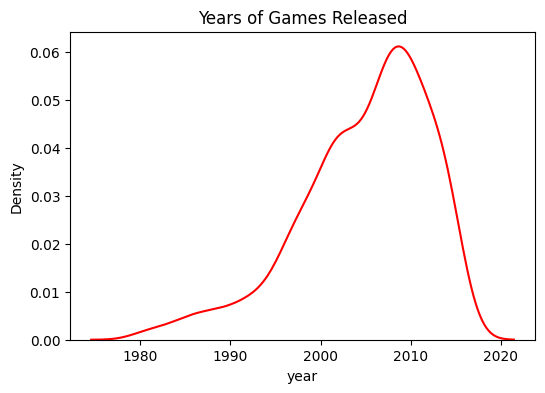

In [9]:
plt.figure(figsize=(6,4))
sns.kdeplot(data['year'], color= 'r')
plt.title('Years of Games Released')
plt.show()

In [10]:
# sort the dataset by global_sales in descending order and select the top 100 rows

top100 = data.sort_values("global_sales", ascending=False).head(100)

# count the number of games per platform
platform_counts = top100["platform"].value_counts()

print("Top Platforms in the Top 100 Best-Selling Games:")
print(platform_counts)

Top Platforms in the Top 100 Best-Selling Games:
platform
X360    16
Wii     15
DS      13
PS3      9
3DS      7
GB       6
PS2      6
PS       5
PS4      5
SNES     4
NES      4
N64      4
GBA      2
XB       1
PC       1
2600     1
PSP      1
Name: count, dtype: int64


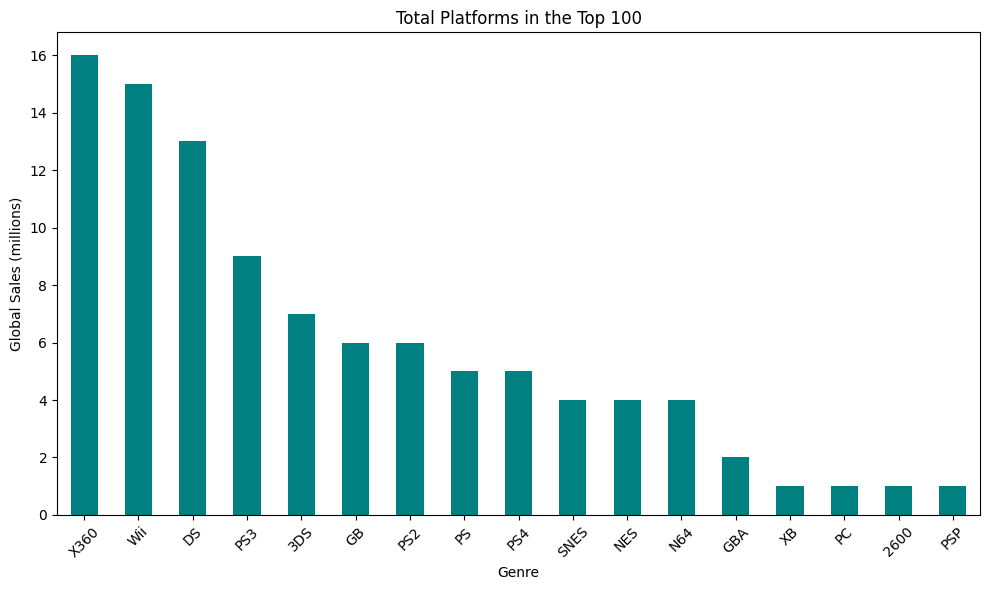

In [11]:
# Plot
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='teal')
plt.title("Total Platforms in the Top 100")
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

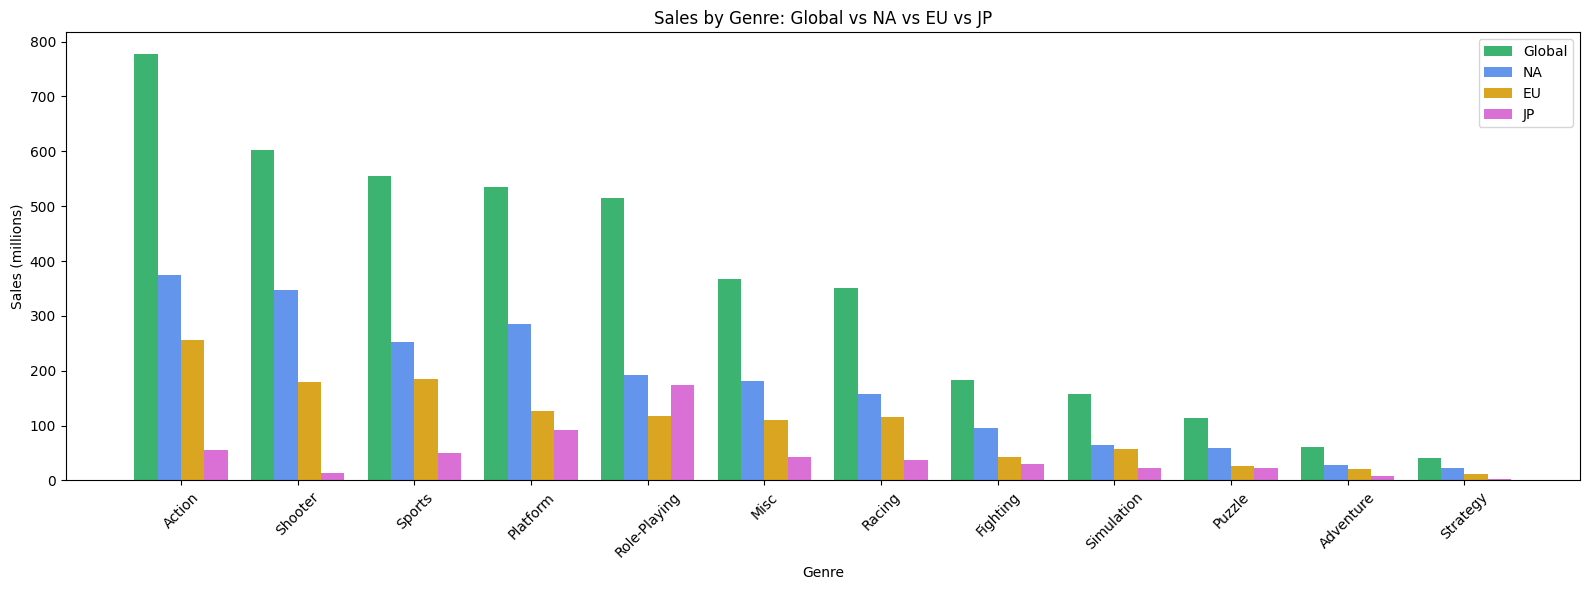

In [12]:
# Group and sum relevant sales
genre_sales = data.groupby("genre")[["global_sales", "na_sales", "eu_sales", "jp_sales"]].sum()

# Sort by global sales
genre_sales = genre_sales.sort_values("global_sales", ascending=False)

# Plot setup
plt.figure(figsize=(16, 6))
x = range(len(genre_sales))
bar_width = 0.2

# Bars for each region
plt.bar(x, genre_sales["global_sales"], width=bar_width, label="Global", color="mediumseagreen")
plt.bar([i + bar_width for i in x], genre_sales["na_sales"], width=bar_width, label="NA", color="cornflowerblue")
plt.bar([i + 2 * bar_width for i in x], genre_sales["eu_sales"], width=bar_width, label="EU", color="goldenrod")
plt.bar([i + 3 * bar_width for i in x], genre_sales["jp_sales"], width=bar_width, label="JP", color="orchid")

# Labels and formatting
plt.xlabel("Genre")
plt.ylabel("Sales (millions)")
plt.title("Sales by Genre: Global vs NA vs EU vs JP")
plt.xticks([i + 1.5 * bar_width for i in x], genre_sales.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 1.4 Algorithm Implementation

In [13]:
# Data cleaning again.
data = data.drop(['platform', 'genre'], axis = 1)

In [14]:
# Feature Selection.
x = data[['year']] # Feature
y = data['global_sales'] # Target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)

In [16]:
x_test

,year
215,1990.0
972,2006.0
44,2014.0
312,1988.0
150,2007.0
...,...
770,2016.0
410,2014.0
214,2010.0
450,2002.0


In [17]:
y_test

215     4.85
972     1.78
44     11.98
312     3.87
150     5.83
       ...  
770     2.13
410     3.28
214     4.87
450     3.09
963     1.80
Name: global_sales, Length: 198, dtype: float64

In [18]:
# Model Training with Linear Regression.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)
y_pred

array([4.2610639 , 4.24285532, 4.23375103, 4.26333997, 4.24171729,
       4.23716514, 4.24171729, 4.23944121, 4.2485455 , 4.24285532,
       4.24171729, 4.25082157, 4.24968354, 4.2610639 , 4.24513139,
       4.24740747, 4.23716514, 4.24740747, 4.26675408, 4.24740747,
       4.23944121, 4.26333997, 4.24285532, 4.24740747, 4.24626943,
       4.23375103, 4.23944121, 4.23716514, 4.24626943, 4.24513139,
       4.25651175, 4.23944121, 4.25195961, 4.23830318, 4.24626943,
       4.23944121, 4.27244426, 4.23375103, 4.23716514, 4.25082157,
       4.25764979, 4.24626943, 4.24057925, 4.24626943, 4.24171729,
       4.25309765, 4.25992586, 4.24171729, 4.25195961, 4.2610639 ,
       4.24740747, 4.26789211, 4.24513139, 4.23716514, 4.2485455 ,
       4.24057925, 4.24057925, 4.24171729, 4.24057925, 4.24171729,
       4.24513139, 4.24057925, 4.2485455 , 4.26333997, 4.23944121,
       4.24740747, 4.23602711, 4.23830318, 4.25878783, 4.25651175,
       4.24740747, 4.24968354, 4.24399336, 4.24285532, 4.25195

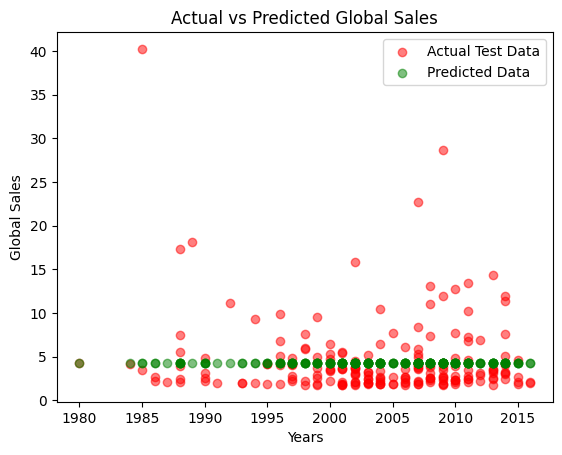

Mean Squared Error: 20.46
R² Score: -0.00


In [20]:
# Scatter plot for actual vs predicted
plt.scatter(x_test, y_test, color='red', label='Actual Test Data', alpha=0.5)
plt.scatter(x_test, y_pred, color='green', label='Predicted Data', alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.legend()
plt.show()

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')